<a href="https://colab.research.google.com/github/KriyaShah13/Contact-/blob/master/Ads_Exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time series analysis and forecasting

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(file_path)
df.head()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


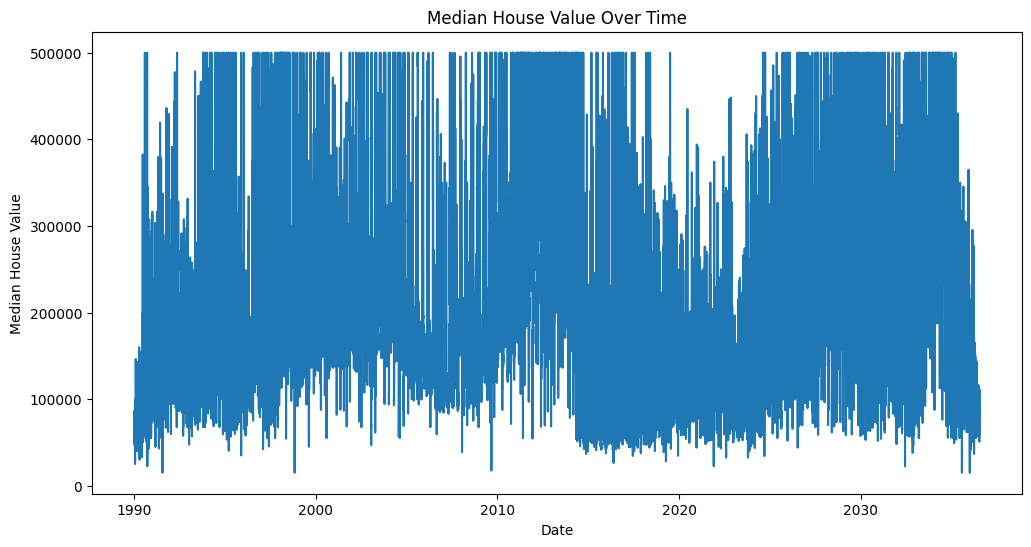

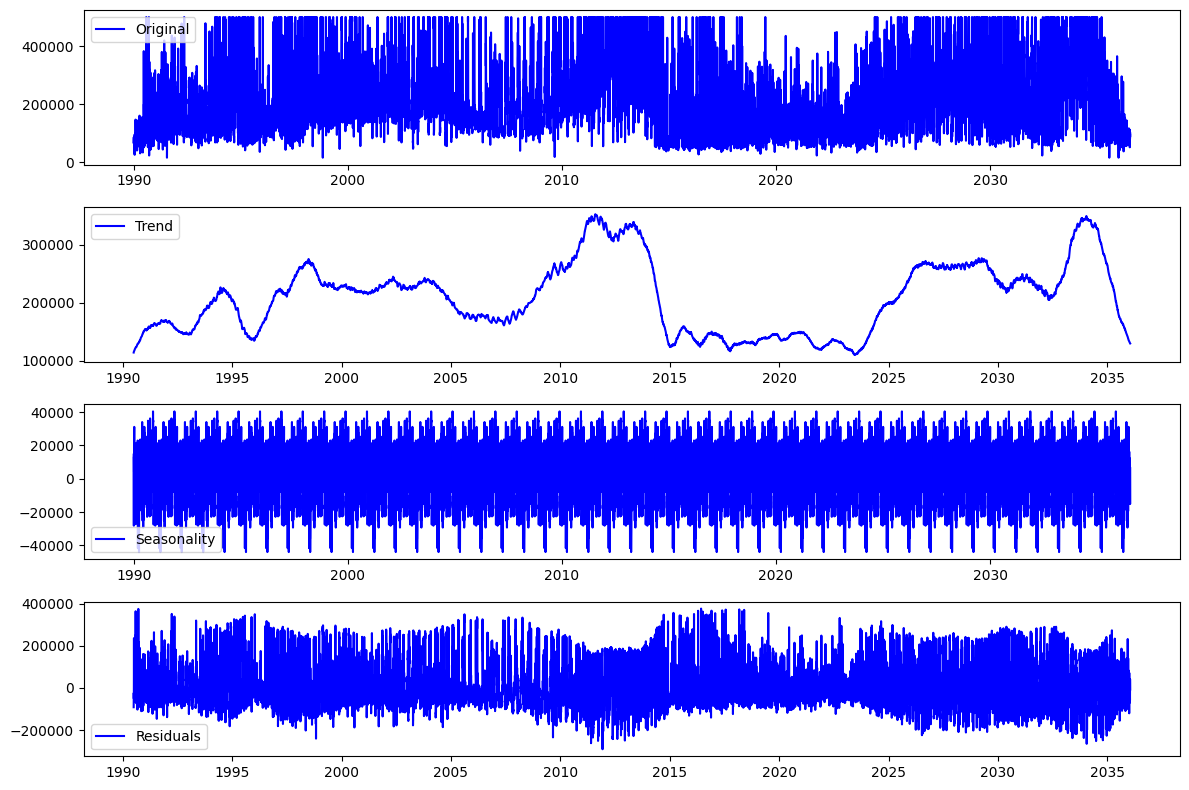

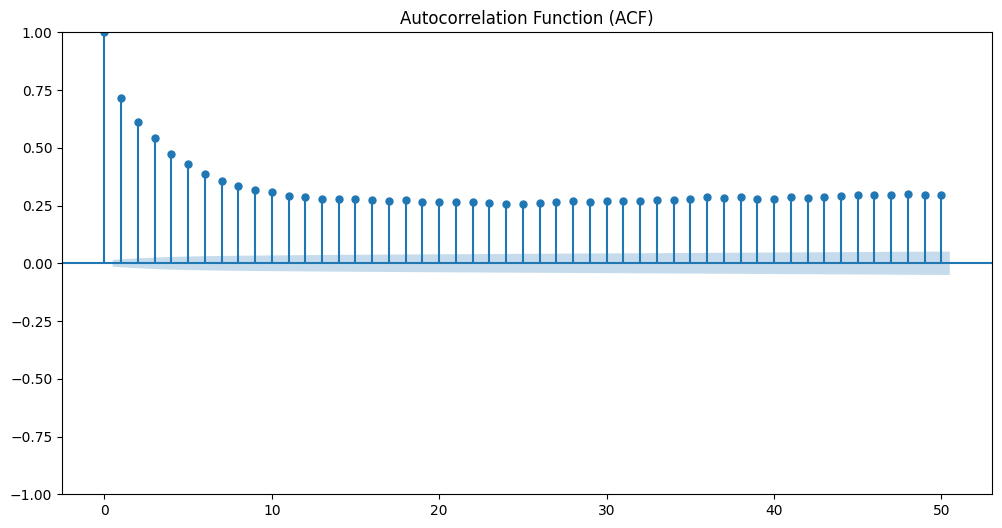

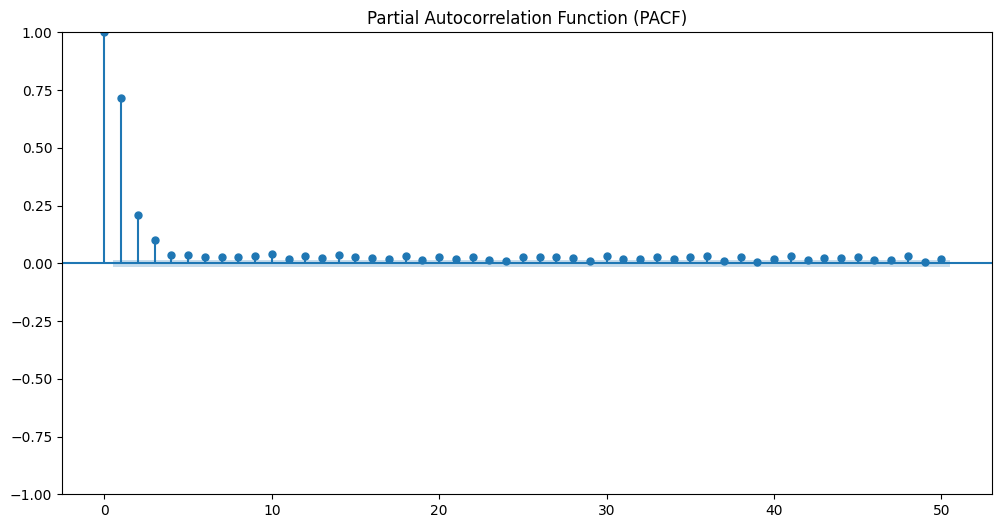

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 'median_house_value' as time series
df['date'] = pd.date_range(start='1/1/1990', periods=len(df), freq='D')
df.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['median_house_value'])
plt.title('Median House Value Over Time')
plt.xlabel('Date')
plt.ylabel('Median House Value')
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(df['median_house_value'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['median_house_value'], label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout()
print("\n\n\n")

# ACF plot
plt.figure(figsize=(12, 6))
plot_acf(df['median_house_value'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
print("\n\n\n")

# PACF plot
plt.figure(figsize=(12, 6))
plot_pacf(df['median_house_value'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
print("\n\n\n")

plt.show()

ADF Statistic: -8.425775974857165
p-value: 1.9287322881935288e-13
Critical Values:
   1%: -3.4307357440465203
   5%: -2.8617104836248384
   10%: -2.566860744068053


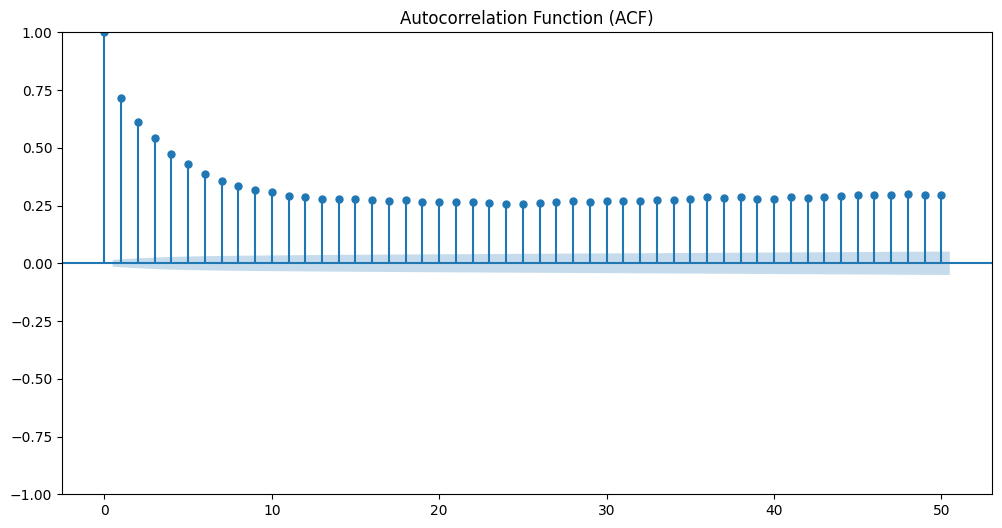

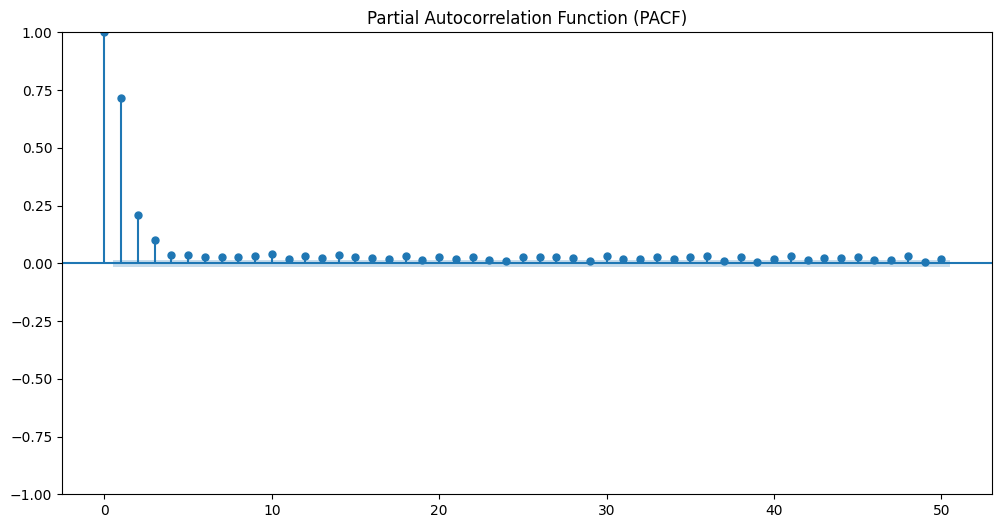

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(df['median_house_value'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Plot the ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(df['median_house_value'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.figure(figsize=(12, 6))
plot_pacf(df['median_house_value'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

# Time series forecasting using linear regression
def linear_regression_forecast(data, window):
    X = pd.DataFrame({'t': range(1, len(data) + 1)})
    y = data.values
    model = LinearRegression()
    model.fit(X[-window:], y[-window:])
    forecast = model.predict([[len(data) + 1]])[0]
    return forecast

# Moving average smoothing model
def moving_average_forecast(data, window):
    return data.rolling(window=window).mean().iloc[-1]

# ARIMA model
def arima_forecast(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast()[0]
    return forecast

# Define window size for linear regression and moving average
window_size = 30

# Linear regression forecast
linear_regression_forecast_value = linear_regression_forecast(df['median_house_value'], window_size)
print("Linear Regression Forecast:", linear_regression_forecast_value)

# Moving average forecast
moving_average_forecast_value = moving_average_forecast(df['median_house_value'], window_size)
print("Moving Average Forecast:", moving_average_forecast_value)

# ARIMA forecast
arima_order = (5, 1, 0)
arima_forecast_value = arima_forecast(df['median_house_value'], order=arima_order)
print("ARIMA Forecast:", arima_forecast_value)

import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Linear Regression Forecast: 86208.50574712642
Moving Average Forecast: 79563.33333333333
ARIMA Forecast: 92899.02124773302


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual values
actual_values = df['median_house_value']

# Forecasted values
linear_regression_forecast_values = [linear_regression_forecast(df['median_house_value'], window_size)]
moving_average_forecast_values = [moving_average_forecast(df['median_house_value'], window_size)]
arima_forecast_values = [arima_forecast(df['median_house_value'], order=arima_order)]

# Mean Absolute Error (MAE)
linear_regression_mae = mean_absolute_error(actual_values[-1:], linear_regression_forecast_values)
moving_average_mae = mean_absolute_error(actual_values[-1:], moving_average_forecast_values)
arima_mae = mean_absolute_error(actual_values[-1:], arima_forecast_values)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

linear_regression_mape = mean_absolute_percentage_error(actual_values[-1:], linear_regression_forecast_values)
moving_average_mape = mean_absolute_percentage_error(actual_values[-1:], moving_average_forecast_values)
arima_mape = mean_absolute_percentage_error(actual_values[-1:], arima_forecast_values)

# Mean Squared Error (MSE)
linear_regression_mse = mean_squared_error(actual_values[-1:], linear_regression_forecast_values)
moving_average_mse = mean_squared_error(actual_values[-1:], moving_average_forecast_values)
arima_mse = mean_squared_error(actual_values[-1:], arima_forecast_values)

# Root Mean Squared Error (RMSE)
linear_regression_rmse = np.sqrt(linear_regression_mse)
moving_average_rmse = np.sqrt(moving_average_mse)
arima_rmse = np.sqrt(arima_mse)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Linear Regression:")
print("MAE:", linear_regression_mae)
print("MAPE:", linear_regression_mape)
print("MSE:", linear_regression_mse)
print("RMSE:", linear_regression_rmse)
print()
print("Moving Average:")
print("MAE:", moving_average_mae)
print("MAPE:", moving_average_mape)
print("MSE:", moving_average_mse)
print("RMSE:", moving_average_rmse)
print()
print("ARIMA:")
print("MAE:", arima_mae)
print("MAPE:", arima_mape)
print("MSE:", arima_mse)
print("RMSE:", arima_rmse)


Evaluation Metrics:
Linear Regression:
MAE: 8391.494252873585
MAPE: 8.87050132439068
MSE: 70417175.7960104
RMSE: 8391.494252873585

Moving Average:
MAE: 15036.666666666672
MAPE: 15.894996476391832
MSE: 226101344.4444446
RMSE: 15036.666666666672

ARIMA:
MAE: 1700.9787522669794
MAPE: 1.7980747909798935
MSE: 2893328.71566373
RMSE: 1700.9787522669794
